# Baseball Pitch Modeling

In [130]:
import pandas as pd
import numpy as np
import pybaseball
from pybaseball import statcast
from datetime import date
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform


## Data Collection

In [85]:
selected_columns = [
    'game_date', 'player_name', 'release_speed', 'release_pos_x', 'release_pos_z', 'pitcher', 'p_throws',
    'description', 'pitch_type', 'pfx_x', 'pfx_z', 'effective_speed', 'release_extension', 'release_spin_rate',
    'estimated_woba_using_speedangle'
]

required_numbers = [
    'game_date', 'player_name', 'release_speed', 'release_pos_x', 'release_pos_z', 'pitcher', 'p_throws',
    'description',  'pitch_type', 'pfx_x', 'pfx_z', 'effective_speed', 'release_extension', 'release_spin_rate',
]


dates = {
    2015: ["2015-04-05", "2015-10-04"],
    2016: ["2016-04-03", "2016-10-02"],
    2017: ["2017-04-02", "2017-10-01"],
    2018: ["2018-03-29", "2018-10-01"],
    2019: ["2019-03-20", "2019-09-29"],
    2020: ["2020-07-23", "2020-09-27"],
    2021: ["2021-04-01", "2021-10-03"],
    2022: ["2022-04-07", "2022-10-05"],
    2023: ["2023-03-30", "2023-10-01"],
    2024: ["2024-03-20", "2024-09-30"],
    2025: ["2025-03-18", str(date.today())]
}

pybaseball.cache.enable()

In [87]:
data = {}
for year in range(2015, 2026):
    df = statcast(start_dt=dates[year][0], end_dt=dates[year][1])[selected_columns + ['game_type']]
    
    df = df[df['game_type'] == 'R']
    df = df.drop(columns='game_type')
    df_cleaned = df.dropna(subset=required_numbers).copy()

    ## turn movement into inches
    df_cleaned['pfx_x'] = df_cleaned['pfx_x'] * 12
    df_cleaned['pfx_z'] = df_cleaned['pfx_z'] * 12

    ## flip horizontal movement for left handed pitchers
    ## normalizes arm side vs glove size movement
    df_cleaned['pfx_x_adj'] = np.where(
        df_cleaned['p_throws'] == 'R',
        df_cleaned['pfx_x'], -df_cleaned['pfx_x']
    )
    
    data[year] = df_cleaned

This is a large query, it may take a moment to complete


100%|██████████| 183/183 [00:46<00:00,  3.91it/s]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


This is a large query, it may take a moment to complete


100%|██████████| 183/183 [00:50<00:00,  3.63it/s]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


This is a large query, it may take a moment to complete


100%|██████████| 183/183 [00:42<00:00,  4.35it/s]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


This is a large query, it may take a moment to complete


100%|██████████| 187/187 [00:42<00:00,  4.40it/s]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


This is a large query, it may take a moment to complete


100%|██████████| 194/194 [01:02<00:00,  3.09it/s]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


This is a large query, it may take a moment to complete


100%|██████████| 67/67 [00:14<00:00,  4.78it/s]


This is a large query, it may take a moment to complete


100%|██████████| 186/186 [00:40<00:00,  4.54it/s]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


This is a large query, it may take a moment to complete


100%|██████████| 182/182 [00:47<00:00,  3.81it/s]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


This is a large query, it may take a moment to complete


100%|██████████| 186/186 [00:46<00:00,  3.96it/s]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


This is a large query, it may take a moment to complete


100%|██████████| 195/195 [01:01<00:00,  3.17it/s]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


This is a large query, it may take a moment to complete


100%|██████████| 96/96 [00:28<00:00,  3.39it/s]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


## K-Means Implementation

In [88]:
classification_cols = [
    "pfx_x_adj",
    "pfx_z"
]

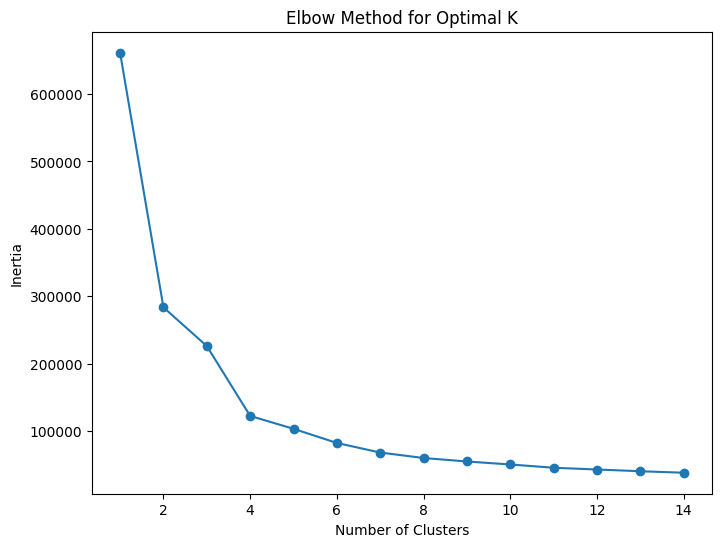

In [89]:
inertia = []
movement_data = data[2025][classification_cols]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(movement_data)

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 15), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [150]:
n_clusters = 11
palette = sns.color_palette('tab10', n_clusters)


cluster
2     50202
0     40848
9     40824
7     37567
3     34074
10    26417
6     26270
5     24225
8     19173
1     16132
4     14894
Name: count, dtype: int64


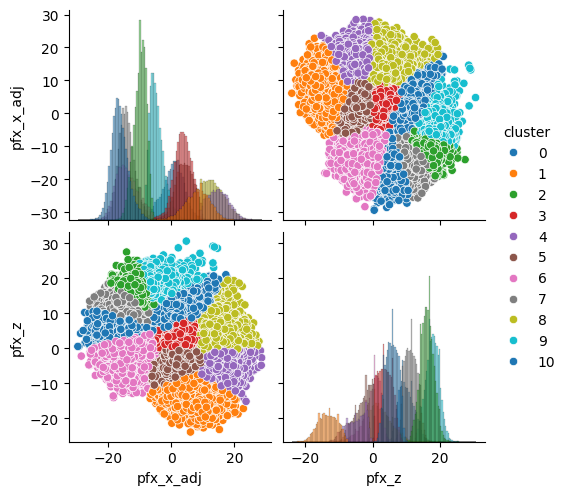

In [151]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data[2025]['cluster'] = kmeans.fit_predict(features_scaled)

print(data[2025]['cluster'].value_counts())

sns.pairplot(data[2025][['pfx_x_adj', 'pfx_z' ,'cluster']], hue='cluster', palette=palette, diag_kind='hist', markers='o')

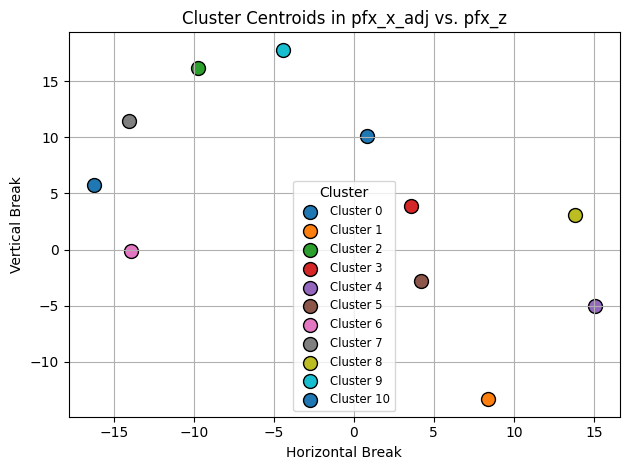

Average values for each feature by cluster:
         pfx_x_adj      pfx_z
cluster                      
0       -16.258804   5.749036
1         8.374136  -13.36092
2        -9.730486  16.188091
3         3.602839   3.872108
4        15.068766  -5.014878
5         4.218700  -2.843656
6       -13.928154  -0.154739
7       -14.062785  11.438827
8        13.813663   3.108528
9        -4.443407  17.822975
10        0.828049  10.128469


In [152]:
cluster_means = data[2025].groupby('cluster')[['pfx_x_adj', 'pfx_z']].mean()
centroid_colors = [palette[c] for c in cluster_means.index]

for c, (x, y) in cluster_means.iterrows():
    plt.scatter(
        x, 
        y, 
        color=centroid_colors[c], 
        s=100, 
        marker='o', 
        edgecolor='k', 
        label=f'Cluster {c}'
    )

plt.xlabel('Horizontal Break')
plt.ylabel('Vertical Break')
plt.title(f'{n_clusters} Cluster Centroids in pfx_x_adj vs. pfx_z')
plt.grid(True)

plt.legend(title='Cluster', loc='best', fontsize='small', frameon=True)
plt.tight_layout()
plt.show()

print("Average values for each feature by cluster:")
print(cluster_means)

In [153]:
coords = cluster_means[['pfx_x_adj', 'pfx_z']].astype(float).to_numpy()
coords = cluster_means[['pfx_x_adj', 'pfx_z']].astype(float).to_numpy()

dists_condensed = pdist(coords, metric='euclidean')
dist_matrix = pd.DataFrame(
    squareform(dists_condensed),
    index=cluster_means.index,
    columns=cluster_means.index
)

mask = np.triu(np.ones(dist_matrix.shape, dtype=bool), k=1)
lower_half = dist_matrix.mask(mask)

print(lower_half)

cluster         0          1          2          3          4          5   \
cluster                                                                     
0         0.000000        NaN        NaN        NaN        NaN        NaN   
1        31.176468   0.000000        NaN        NaN        NaN        NaN   
2        12.312303  34.654313   0.000000        NaN        NaN        NaN   
3        19.950131  17.881346  18.151061   0.000000        NaN        NaN   
4        33.125195  10.699275  32.627731  14.506758   0.000000        NaN   
5        22.207263  11.308426  23.596338   6.743943  11.065177   0.000000   
6         6.347165  25.919015  16.873308  17.987529  29.401400  18.344987   
7         6.098870  33.443128   6.428400  19.217947  33.457012  23.199181   
8        30.188169  17.344485  26.933287  10.239335   8.219794  11.291227   
9        16.893301  33.715348   5.534081  16.104929  30.038183  22.408519   
10       17.639160  24.671741  12.173812   6.844086  20.787472  13.407928   

/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/1890807666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_data['cluster'] = kmeans.fit_predict(features_scaled)



=== 7 Clusters ===
cluster
3    86399
4    57076
0    54101
6    41472
1    40572
2    27922
5    23084
Name: count, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (11) than needed (7), which may not be intended.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (11) than needed (7), which may not be intended.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: The palette list has more values (11) than needed (7), which may not be intended.
  func(x=x, y=y, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: The palette list has more values (11) than needed (7), which may not be intended.
  func(x=x, y=y, **kwargs)


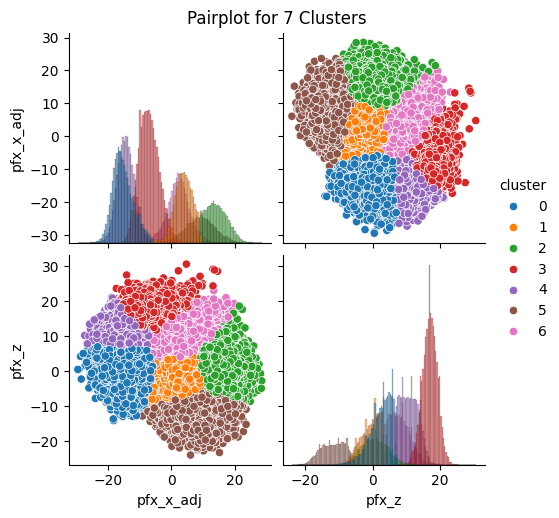

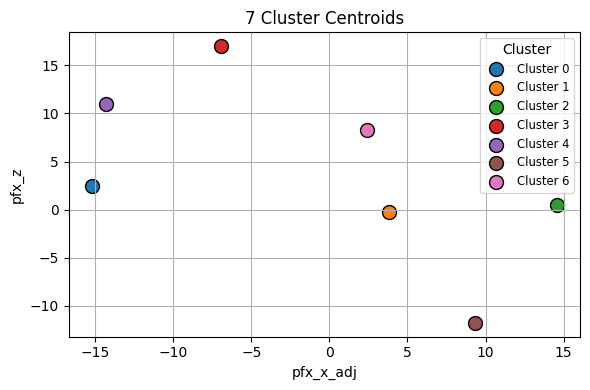

Average values for each feature by cluster:
         pfx_x_adj      pfx_z
cluster                      
0       -15.202739   2.439781
1         3.845327  -0.297217
2        14.555942   0.510819
3        -6.909373  16.990937
4       -14.284792   11.00015
5         9.316926 -11.761357
6         2.417147   8.251678
Lower triangular Euclidean distance matrix:
cluster          0          1          2          3          4          5    6
cluster                                                                       
0         0.000000        NaN        NaN        NaN        NaN        NaN  NaN
1        19.243699   0.000000        NaN        NaN        NaN        NaN  NaN
2        29.821132  10.741052   0.000000        NaN        NaN        NaN  NaN
3        16.748613  20.360349  27.062040   0.000000        NaN        NaN  NaN
4         8.609445  21.361921  30.688987   9.501912   0.000000        NaN  NaN
5        28.335248  12.702949  13.343672  33.014954  32.789133   0.000000  NaN
6        1

/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/1890807666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_data['cluster'] = kmeans.fit_predict(features_scaled)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (11) than needed (8), which may not be intended.
  func(x=vector, **plot_kwargs)



=== 8 Clusters ===
cluster
2    65906
7    50554
0    49103
3    41281
5    40097
6    32945
4    27705
1    23035
Name: count, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (11) than needed (8), which may not be intended.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: The palette list has more values (11) than needed (8), which may not be intended.
  func(x=x, y=y, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: The palette list has more values (11) than needed (8), which may not be intended.
  func(x=x, y=y, **kwargs)


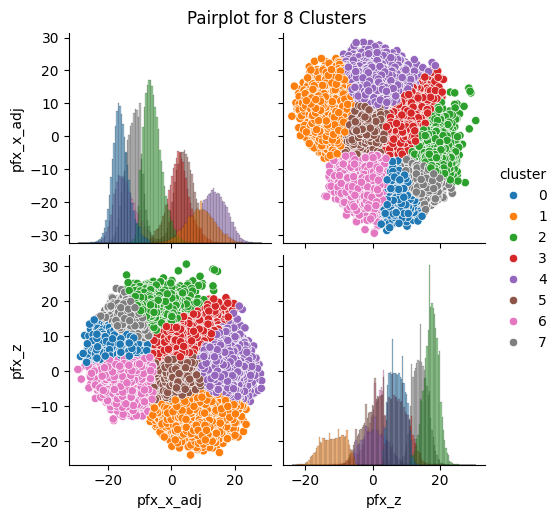

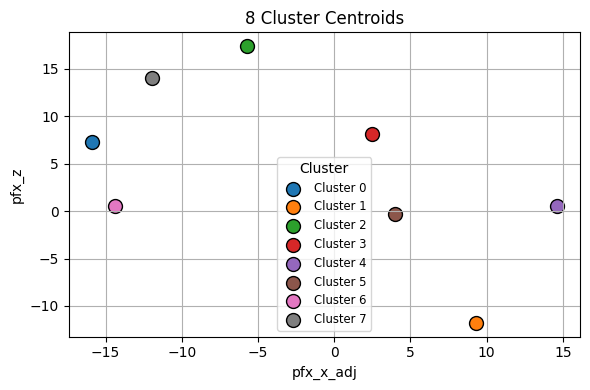

Average values for each feature by cluster:
         pfx_x_adj      pfx_z
cluster                      
0       -15.898291   7.340802
1         9.314053 -11.772466
2        -5.723595  17.395987
3         2.449801    8.10849
4        14.600918   0.493895
5         3.959749  -0.314304
6       -14.405719   0.510323
7       -11.937890  14.091101
Lower triangular Euclidean distance matrix:
cluster          0          1          2          3          4          5  \
cluster                                                                     
0         0.000000        NaN        NaN        NaN        NaN        NaN   
1        31.638256   0.000000        NaN        NaN        NaN        NaN   
2        14.304935  32.816604   0.000000        NaN        NaN        NaN   
3        18.364145  21.032602  12.371824   0.000000        NaN        NaN   
4        31.258309  13.357192  26.434193  14.339864   0.000000        NaN   
5        21.282443  12.647453  20.184686   8.557067  10.671817   0.000000

/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/1890807666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_data['cluster'] = kmeans.fit_predict(features_scaled)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (11) than needed (9), which may not be intended.
  func(x=vector, **plot_kwargs)



=== 9 Clusters ===
cluster
2    65026
7    50568
0    49140
5    39445
3    38944
6    33177
8    19709
1    17962
4    16655
Name: count, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (11) than needed (9), which may not be intended.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: The palette list has more values (11) than needed (9), which may not be intended.
  func(x=x, y=y, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: The palette list has more values (11) than needed (9), which may not be intended.
  func(x=x, y=y, **kwargs)


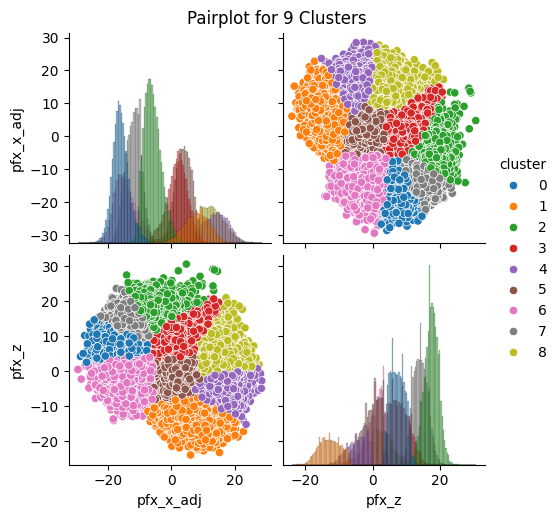

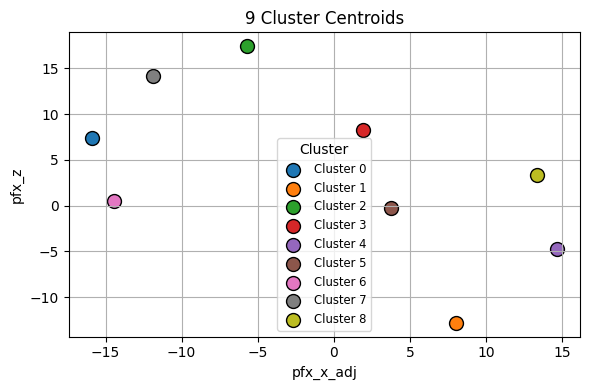

Average values for each feature by cluster:
         pfx_x_adj      pfx_z
cluster                      
0       -15.894046   7.388039
1         8.010491 -12.814513
2        -5.726938  17.437202
3         1.952650    8.28982
4        14.654295   -4.73143
5         3.785493  -0.242482
6       -14.433667   0.538374
7       -11.902285    14.1365
8        13.387474   3.390546
Lower triangular Euclidean distance matrix:
cluster          0          1          2          3          4          5  \
cluster                                                                     
0         0.000000        NaN        NaN        NaN        NaN        NaN   
1        31.298083   0.000000        NaN        NaN        NaN        NaN   
2        14.295306  33.224737   0.000000        NaN        NaN        NaN   
3        17.869465  21.956555  11.943645   0.000000        NaN        NaN   
4        32.864611  10.463095  30.113831  18.190237   0.000000        NaN   
5        21.107087  13.262977  20.076294   

/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/1890807666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_data['cluster'] = kmeans.fit_predict(features_scaled)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (11) than needed (10), which may not be intended.
  func(x=vector, **plot_kwargs)



=== 10 Clusters ===
cluster
2    54844
0    45448
7    42945
3    38864
5    35579
6    30110
9    29662
8    19670
1    17448
4    16056
Name: count, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (11) than needed (10), which may not be intended.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: The palette list has more values (11) than needed (10), which may not be intended.
  func(x=x, y=y, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: The palette list has more values (11) than needed (10), which may not be intended.
  func(x=x, y=y, **kwargs)


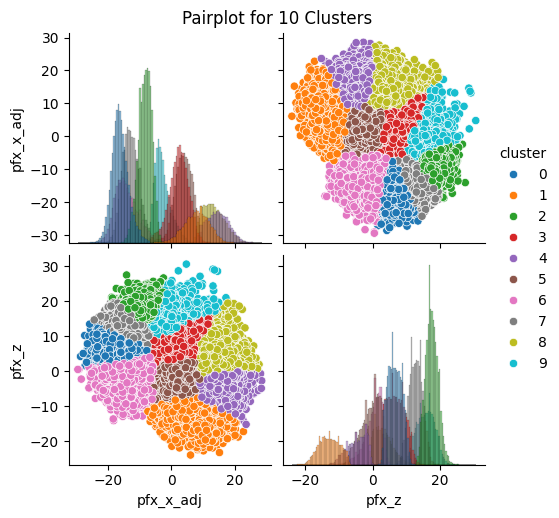

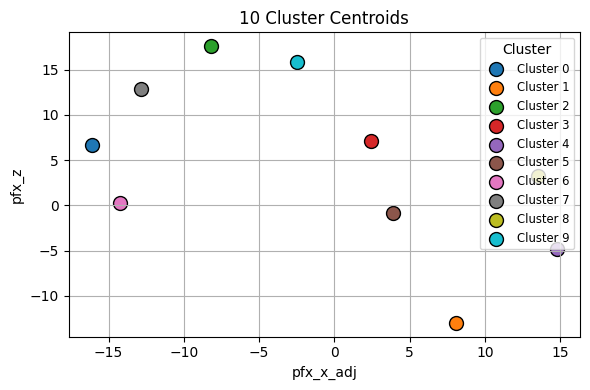

Average values for each feature by cluster:
         pfx_x_adj      pfx_z
cluster                      
0       -16.107072   6.671816
1         8.087558 -12.962111
2        -8.170570  17.581287
3         2.431291   7.161651
4        14.778326  -4.863012
5         3.898518  -0.858125
6       -14.235854   0.232452
7       -12.837656  12.817355
8        13.512153   3.249273
9        -2.504267  15.791243
Lower triangular Euclidean distance matrix:
cluster          0          1          2          3          4          5  \
cluster                                                                     
0         0.000000        NaN        NaN        NaN        NaN        NaN   
1        31.158807   0.000000        NaN        NaN        NaN        NaN   
2        13.490908  34.600952   0.000000        NaN        NaN        NaN   
3        18.544833  20.903568  14.865001   0.000000        NaN        NaN   
4        32.969077  10.505322  32.099819  17.234900   0.000000        NaN   
5        21.3

/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/1890807666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_data['cluster'] = kmeans.fit_predict(features_scaled)



=== 11 Clusters ===
cluster
2     50202
0     40848
9     40824
7     37567
3     34074
10    26417
6     26270
5     24225
8     19173
1     16132
4     14894
Name: count, dtype: int64


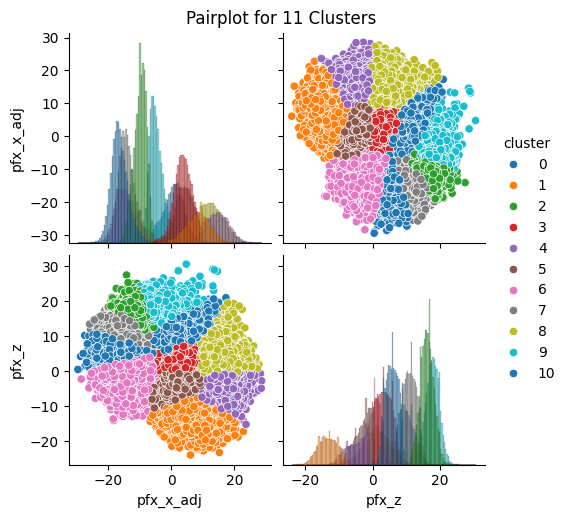

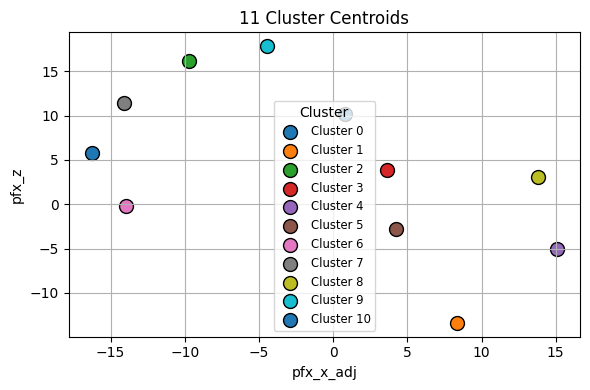

Average values for each feature by cluster:
         pfx_x_adj      pfx_z
cluster                      
0       -16.258804   5.749036
1         8.374136  -13.36092
2        -9.730486  16.188091
3         3.602839   3.872108
4        15.068766  -5.014878
5         4.218700  -2.843656
6       -13.928154  -0.154739
7       -14.062785  11.438827
8        13.813663   3.108528
9        -4.443407  17.822975
10        0.828049  10.128469
Lower triangular Euclidean distance matrix:
cluster         0          1          2          3          4          5   \
cluster                                                                     
0         0.000000        NaN        NaN        NaN        NaN        NaN   
1        31.176468   0.000000        NaN        NaN        NaN        NaN   
2        12.312303  34.654313   0.000000        NaN        NaN        NaN   
3        19.950131  17.881346  18.151061   0.000000        NaN        NaN   
4        33.125195  10.699275  32.627731  14.506758   0.0000

In [157]:
for centers in range(7, 12):
    kmeans = KMeans(n_clusters=centers, random_state=42)
    movement_data['cluster'] = kmeans.fit_predict(features_scaled)

    # 1) Counts
    print(f"\n=== {centers} Clusters ===")
    print(movement_data['cluster'].value_counts())

    # 2) Pairplot
    grid = sns.pairplot(
        movement_data[classification_cols + ['cluster']],
        hue='cluster',
        palette=palette,
        diag_kind='hist',
        markers='o'
    )
    grid.figure.suptitle(f'Pairplot for {centers} Clusters', y=1.02)
    plt.show()

    # 3) Compute centroids
    cluster_means = movement_data.groupby('cluster')[classification_cols].mean()

    # 4) Scatter centroids with legend
    centroid_colors = [palette[c] for c in cluster_means.index]
    plt.figure(figsize=(6, 4))
    for c, (x, y) in cluster_means.iterrows():
        plt.scatter(
            x, y,
            color=centroid_colors[c],
            s=100,
            marker='o',
            edgecolor='k',
            label=f'Cluster {c}'
        )
    plt.xlabel('pfx_x_adj')
    plt.ylabel('pfx_z')
    plt.title(f'{centers} Cluster Centroids')
    plt.grid(True)
    plt.legend(title='Cluster', loc='best', fontsize='small', frameon=True)
    plt.tight_layout()
    plt.show()

    # 5) Print centroid coordinates
    print("Average values for each feature by cluster:")
    print(cluster_means)

    # 6) Compute & display lower‐triangle distance matrix
    coords = cluster_means[classification_cols].to_numpy(dtype=float)
    dists = pdist(coords, metric='euclidean')
    dist_matrix = pd.DataFrame(
        squareform(dists),
        index=cluster_means.index,
        columns=cluster_means.index
    )
    mask = np.triu(np.ones(dist_matrix.shape, dtype=bool), k=1)
    lower_half = dist_matrix.mask(mask)

    print("Lower triangular Euclidean distance matrix:")
    print(lower_half)
    print("Smallest non-zero distance:", lower_half.stack().loc[lambda x: x > 0].min())
        